In [28]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
from chainerrl import wrappers

In [44]:
from dacbench.benchmarks import LubyBenchmark
from dacbench.wrappers import PerformanceTrackingWrapper, RewardNoiseWrapper
from examples.example_utils import make_chainer_dqn

In [45]:
# Get environment
bench = LubyBenchmark()
env = bench.get_environment()

In [46]:
# Use a chainer agent to train
rl_agent = make_chainer_dqn(env.observation_space.low.size, env.action_space)
env = wrappers.CastObservationToFloat32(env)

In [43]:
# Wrap the environment to add noise and to track performance
env = RewardNoiseWrapper(env, noise_dist="normal", dist_args=[0, 0.3])
env = PerformanceTrackingWrapper(env)

In [37]:
# Basic training loop for 10 episodes
for i in range(20):
    # Reset environment at the start of every episode
    state = env.reset()
    done = False
    reward = 0
    r = 0
    while not done:
        # Predict value
        action = rl_agent.act_and_train(state, reward)
        # Apply value in environment
        r += reward
        next_state, reward, done, info = env.step(action)
        state = next_state
    rl_agent.stop_episode_and_train(state, reward, done=done)
    print(f"Episode {i+1}/20..............reward: {r}")

Episode 1/20..............reward: -5.20384958838798
Episode 2/20..............reward: -6.395694543556523
Episode 3/20..............reward: -6.954706230706154
Episode 4/20..............reward: -6.2388404092233545
Episode 5/20..............reward: -6.5990717207458305
Episode 6/20..............reward: -6.087218311836842
Episode 7/20..............reward: -5.992453078875494
Episode 8/20..............reward: -5.084509532878438
Episode 9/20..............reward: -6.425407462362576
Episode 10/20..............reward: -4.566084750067951
Episode 11/20..............reward: -4.86264737335657
Episode 12/20..............reward: -4.56519542481122
Episode 13/20..............reward: -4.836298814424439
Episode 14/20..............reward: -6.816038051259905
Episode 15/20..............reward: -5.128772437989416
Episode 16/20..............reward: -5.486744947154459
Episode 17/20..............reward: -4.455569869341838
Episode 18/20..............reward: -5.913029489126064
Episode 19/20..............reward: -5.

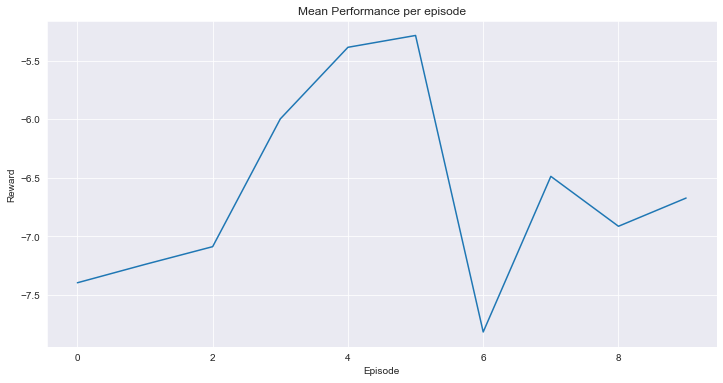

In [38]:
# Plot performance graph
env.render_performance()

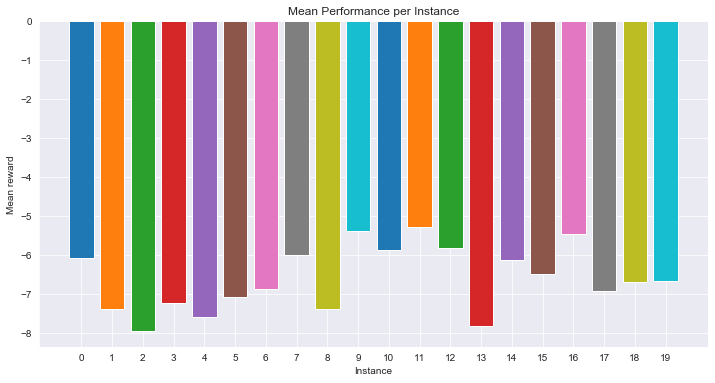

In [39]:
# Plot mean performance per instance
env.render_instance_performance()